In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Remove all empty files
folder_path = '.'
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path) and os.path.getsize(file_path) < 5: # Less than 5 bytes
        os.remove(file_path)
        print(f'Deleted: {file_path}')

In [3]:
station_files = sorted(glob.glob('*.csv'))
station_files.remove('netatmo_stations.csv')
station_files.remove('temperatures.csv')
station_files.remove('diff.csv')
station_files

['70:ee:50:01:ad:68.csv',
 '70:ee:50:01:d9:c2.csv',
 '70:ee:50:01:f2:2a.csv',
 '70:ee:50:04:a4:52.csv',
 '70:ee:50:06:91:04.csv',
 '70:ee:50:12:7b:c8.csv',
 '70:ee:50:12:a7:10.csv',
 '70:ee:50:13:33:08.csv',
 '70:ee:50:17:bf:b2.csv',
 '70:ee:50:19:c7:46.csv',
 '70:ee:50:29:14:86.csv',
 '70:ee:50:2b:2b:98.csv',
 '70:ee:50:32:af:3e.csv',
 '70:ee:50:36:a7:2a.csv',
 '70:ee:50:53:0f:a8.csv',
 '70:ee:50:58:a0:fa.csv',
 '70:ee:50:5e:d4:ec.csv',
 '70:ee:50:5f:4b:6e.csv',
 '70:ee:50:65:03:ec.csv',
 '70:ee:50:65:37:e0.csv',
 '70:ee:50:65:69:92.csv',
 '70:ee:50:65:71:38.csv',
 '70:ee:50:6b:25:74.csv',
 '70:ee:50:6b:91:0c.csv',
 '70:ee:50:71:59:b0.csv',
 '70:ee:50:73:e2:d8.csv',
 '70:ee:50:74:10:4c.csv',
 '70:ee:50:7a:6d:28.csv',
 '70:ee:50:7a:7d:b6.csv',
 '70:ee:50:7a:c2:72.csv',
 '70:ee:50:7f:a0:da.csv',
 '70:ee:50:7f:a6:e0.csv',
 '70:ee:50:7f:b1:c2.csv',
 '70:ee:50:7f:b6:74.csv',
 '70:ee:50:83:89:04.csv',
 '70:ee:50:83:90:a6.csv',
 '70:ee:50:83:94:74.csv',
 '70:ee:50:84:16:8e.csv',
 '70:ee:50:8

In [4]:
#for csv_file in station_files:
df = pd.read_csv(station_files[0], delimiter=',')
df.head()

,date,time,temp
0,2023-05-31,21:05:05,25.2
1,2023-05-31,21:14:29,25.2
2,2023-05-31,21:24:44,25.1
3,2023-05-31,21:34:59,25.0
4,2023-05-31,21:50:22,24.8


In [5]:
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
df.head(10)

,date,time,temp
0,2023-05-31,2023-05-31 21:05:05,25.2
1,2023-05-31,2023-05-31 21:14:29,25.2
2,2023-05-31,2023-05-31 21:24:44,25.1
3,2023-05-31,2023-05-31 21:34:59,25.0
4,2023-05-31,2023-05-31 21:50:22,24.8
5,2023-05-31,2023-05-31 21:59:46,24.7
6,2023-05-31,2023-05-31 22:10:01,24.5
7,2023-05-31,2023-05-31 22:25:24,24.3
8,2023-05-31,2023-05-31 22:35:39,24.5
9,2023-05-31,2023-05-31 22:50:10,24.4


In [6]:
df['hour'] = df['time'].dt.hour
df.head(10)

,date,time,temp,hour
0,2023-05-31,2023-05-31 21:05:05,25.2,21
1,2023-05-31,2023-05-31 21:14:29,25.2,21
2,2023-05-31,2023-05-31 21:24:44,25.1,21
3,2023-05-31,2023-05-31 21:34:59,25.0,21
4,2023-05-31,2023-05-31 21:50:22,24.8,21
5,2023-05-31,2023-05-31 21:59:46,24.7,21
6,2023-05-31,2023-05-31 22:10:01,24.5,22
7,2023-05-31,2023-05-31 22:25:24,24.3,22
8,2023-05-31,2023-05-31 22:35:39,24.5,22
9,2023-05-31,2023-05-31 22:50:10,24.4,22


In [7]:
# For each hour, find the closest timestamp (either before or after)
def get_closest_hour(row, df):
    # Find all rows for the target hour and the next hour (or previous if needed)
    target_hour = row['hour']
    closest_row = df.iloc[(df['time'] - row['time']).abs().argmin()]
    return closest_row

# Apply the function to each row in the dataframe
closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))

# Convert the result back into a dataframe
result = closest_temps.reset_index(drop=True)[['date', 'time', 'temp']]
result.head(10)

/tmp/ipykernel_279160/710818299.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


,date,time,temp
0,2023-05-31,2023-05-31 21:05:05,25.2
1,2023-05-31,2023-05-31 22:10:01,24.5
2,2023-05-31,2023-05-31 23:00:25,24.3
3,2023-06-01,2023-06-01 00:01:05,22.9
4,2023-06-01,2023-06-01 01:01:45,22.0
5,2023-06-01,2023-06-01 02:02:25,21.4
6,2023-06-01,2023-06-01 03:02:14,21.2
7,2023-06-01,2023-06-01 04:08:00,20.9
8,2023-06-01,2023-06-01 05:08:40,20.8
9,2023-06-01,2023-06-01 06:13:36,21.3


In [8]:
result['time'] = result['time'].dt.hour
result.head()

,date,time,temp
0,2023-05-31,21,25.2
1,2023-05-31,22,24.5
2,2023-05-31,23,24.3
3,2023-06-01,0,22.9
4,2023-06-01,1,22.0


In [9]:
# Filter by date interval
start_date = '2023-06-01'
end_date = '2023-08-31'

result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
result.head()

,date,time,temp
3,2023-06-01,0,22.9
4,2023-06-01,1,22.0
5,2023-06-01,2,21.4
6,2023-06-01,3,21.2
7,2023-06-01,4,20.9


In [10]:
result.tail()

,date,time,temp
2201,2023-08-31,19,30.9
2202,2023-08-31,20,30.2
2203,2023-08-31,21,29.6
2204,2023-08-31,22,28.8
2205,2023-08-31,23,28.2


## Preprocess all stations

In [11]:
all_dataframes = []

In [12]:
# For each hour, find the closest timestamp (either before or after)
def get_closest_hour(row, df):
    # Find all rows for the target hour and the next hour (or previous if needed)
    target_hour = row['hour']
    closest_row = df.iloc[(df['time'] - row['time']).abs().argmin()]
    return closest_row

for csv_file in station_files:
    print(f'Processing {csv_file}')
    df = pd.read_csv(csv_file, delimiter=',')
    df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
    df['hour'] = df['time'].dt.hour
    
    # Apply the function to each row in the dataframe
    closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))

    # Convert the result back into a dataframe
    result = closest_temps.reset_index(drop=True)[['date', 'time', 'temp']]

    # Get just the time
    result['time'] = result['time'].dt.hour
    
    # Filter by date interval
    start_date = '2023-06-01'
    end_date = '2023-08-31'
    result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
    #result['station'] = re.search(r"/([^/]+)\.csv$", csv_file).group(1)
    result['station'] = re.search(r"(.+)\.csv$", csv_file).group(1)

    all_dataframes.append(result)

Processing 70:ee:50:01:ad:68.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:01:d9:c2.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))
/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], 

Processing 70:ee:50:01:f2:2a.csv
Processing 70:ee:50:04:a4:52.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:06:91:04.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:12:7b:c8.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:12:a7:10.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:13:33:08.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:bf:b2.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:19:c7:46.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:29:14:86.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2b:2b:98.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:32:af:3e.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:36:a7:2a.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:53:0f:a8.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:58:a0:fa.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:5e:d4:ec.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:5f:4b:6e.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:03:ec.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:37:e0.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:69:92.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:71:38.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:6b:25:74.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:6b:91:0c.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:59:b0.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:73:e2:d8.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:74:10:4c.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7a:6d:28.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7a:7d:b6.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7a:c2:72.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:a0:da.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:a6:e0.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:b1:c2.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:b6:74.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:83:89:04.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:83:90:a6.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:83:94:74.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:84:16:8e.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:84:1c:c4.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:84:2d:18.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:84:2d:26.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:9d:18:44.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:a4:53:92.csv
Processing 70:ee:50:a4:5c:32.csv


/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))
/tmp/ipykernel_279160/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], 

In [13]:
all_dataframes[0]

,date,time,temp,station
3,2023-06-01,0,22.9,70:ee:50:01:ad:68
4,2023-06-01,1,22.0,70:ee:50:01:ad:68
5,2023-06-01,2,21.4,70:ee:50:01:ad:68
6,2023-06-01,3,21.2,70:ee:50:01:ad:68
7,2023-06-01,4,20.9,70:ee:50:01:ad:68
...,...,...,...,...
2201,2023-08-31,19,30.9,70:ee:50:01:ad:68
2202,2023-08-31,20,30.2,70:ee:50:01:ad:68
2203,2023-08-31,21,29.6,70:ee:50:01:ad:68
2204,2023-08-31,22,28.8,70:ee:50:01:ad:68


In [14]:
temperatures = pd.concat(all_dataframes, ignore_index=True)
temperatures.head()

,date,time,temp,station
0,2023-06-01,0,22.9,70:ee:50:01:ad:68
1,2023-06-01,1,22.0,70:ee:50:01:ad:68
2,2023-06-01,2,21.4,70:ee:50:01:ad:68
3,2023-06-01,3,21.2,70:ee:50:01:ad:68
4,2023-06-01,4,20.9,70:ee:50:01:ad:68


In [15]:
temperatures.tail()

,date,time,temp,station
90577,2023-08-31,19,30.9,70:ee:50:a4:5c:32
90578,2023-08-31,20,29.6,70:ee:50:a4:5c:32
90579,2023-08-31,21,28.8,70:ee:50:a4:5c:32
90580,2023-08-31,22,27.9,70:ee:50:a4:5c:32
90581,2023-08-31,23,27.4,70:ee:50:a4:5c:32


In [16]:
temperatures.to_csv('temperatures.csv', index=False)

## Quality Control

Baseline defined in the paper "Citizen data for global mapping of atmospheric urban heat islands"

In [17]:
temperatures.shape

(90582, 4)

In [18]:
# Remove values below -20ºC and above 45ºC
temperatures = temperatures[(temperatures['temp'] >= -20) & (temperatures['temp'] <= 45)]
temperatures.shape

(90449, 4)

In [19]:
# Keep only rows where the temperature difference is within ±thresholdºC
threshold = 10
# Define a function to filter each station's data
def filter_station_data(station_df):
    station_df = station_df.copy()  # Avoid modifying the original dataframe
    station_df['temp_diff_prev'] = station_df['temp'].diff()
    station_df['temp_diff_next'] = station_df['temp'].diff(-1)
    
    # Keep only rows where the temperature difference is within ±thresholdºC
    filtered = station_df[(station_df['temp_diff_prev'].abs() <= threshold) & (station_df['temp_diff_next'].abs() <= threshold)]
    
    return filtered.drop(columns=["temp_diff_prev", "temp_diff_next"])

# Apply filtering per station
temperatures = temperatures.groupby("station", group_keys=False).apply(filter_station_data)
temperatures.shape

/tmp/ipykernel_279160/3283187688.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temperatures = temperatures.groupby("station", group_keys=False).apply(filter_station_data)


(90271, 4)

In [20]:
# Detect outliers checking the data distribution using z-score

# Group by date and time, then compute the mean and standard deviation of temp
grouped = temperatures.groupby(['date', 'time'])['temp'].agg(['mean', 'std'])

# Merge the mean and std back to the original dataframe
temperatures = temperatures.merge(grouped, on=['date', 'time'])

# Compute the Z-score
temperatures['z_score'] = (temperatures['temp'] - temperatures['mean']) / temperatures['std']

# Remove rows where the z-score value is outside the range between -2.32 and 1.64
temperatures = temperatures[(temperatures['z_score'].abs() >= -2.32) & ((temperatures['z_score'].abs() <= 1.64))]
temperatures.shape

(86350, 7)

In [21]:
# Remove unnecessary columns
temperatures = temperatures.drop(columns=['z_score', 'mean', 'std'])
temperatures

,date,time,temp,station
0,2023-06-01,1,22.0,70:ee:50:01:ad:68
1,2023-06-01,2,21.4,70:ee:50:01:ad:68
2,2023-06-01,3,21.2,70:ee:50:01:ad:68
3,2023-06-01,4,20.9,70:ee:50:01:ad:68
4,2023-06-01,5,20.8,70:ee:50:01:ad:68
...,...,...,...,...
90266,2023-08-31,18,31.9,70:ee:50:a4:5c:32
90267,2023-08-31,19,30.9,70:ee:50:a4:5c:32
90268,2023-08-31,20,29.6,70:ee:50:a4:5c:32
90269,2023-08-31,21,28.8,70:ee:50:a4:5c:32


## Compute temperature differences

In [22]:
# As reference, we'll use 70:ee:50:3b:f5:64 (Venta del Olivar)

In [23]:
'''ref_stations = [
    '70:ee:50:7a:c2:72', # Camino de Sanlúcar
    '70:ee:50:71:59:b0', # La Motilla
    '70:ee:50:73:e2:d8', # Dos Hermanas
    '70:ee:50:04:a4:52', # San José de la Rinconada 1
    '70:ee:50:7f:a6:e0', # San José de la Rinconada 2
    '70:ee:50:32:ae:72', # Coria del Río
    '70:ee:50:06:91:04', # La Puebla del Río
    '70:ee:50:65:37:e0', # Almensilla
]'''
'''ref_stations = [
    '70:ee:50:13:33:08'
]'''
ref_stations = [
    '70:ee:50:7a:c2:72', # Camino de Sanlúcar
    '70:ee:50:73:e2:d8', # Dos Hermanas
    #'70:ee:50:7f:a6:e0', # San José de la Rinconada 2
    '70:ee:50:06:91:04', # La Puebla del Río
    '70:ee:50:65:37:e0', # Almensilla
]

In [24]:
# Merge the dataframe with itself to compute the difference with the reference station
#df_ref = temperatures[temperatures['station'] == '70:ee:50:7a:d1:ce'][['date', 'time', 'temp']].rename(columns={'temp': 'temp_ref'})
df_ref = (
    temperatures[temperatures['station'].isin(ref_stations)]
    .groupby(['date', 'time'])['temp']
    .mean()
    .reset_index()
    .rename(columns={'temp': 'temp_ref'})
)
df_merged = pd.merge(temperatures, df_ref, on=['date', 'time'])
df_merged

,date,time,temp,station,temp_ref
0,2023-06-01,1,22.0,70:ee:50:01:ad:68,19.566667
1,2023-06-01,2,21.4,70:ee:50:01:ad:68,19.300000
2,2023-06-01,3,21.2,70:ee:50:01:ad:68,18.866667
3,2023-06-01,4,20.9,70:ee:50:01:ad:68,18.566667
4,2023-06-01,5,20.8,70:ee:50:01:ad:68,18.166667
...,...,...,...,...,...
86345,2023-08-31,18,31.9,70:ee:50:a4:5c:32,31.100000
86346,2023-08-31,19,30.9,70:ee:50:a4:5c:32,29.733333
86347,2023-08-31,20,29.6,70:ee:50:a4:5c:32,28.666667
86348,2023-08-31,21,28.8,70:ee:50:a4:5c:32,27.900000


In [25]:
# Compute the daily temperature difference from reference station for each station
df_merged['temp_diff'] = df_merged['temp'] - df_merged['temp_ref']
df_merged

,date,time,temp,station,temp_ref,temp_diff
0,2023-06-01,1,22.0,70:ee:50:01:ad:68,19.566667,2.433333
1,2023-06-01,2,21.4,70:ee:50:01:ad:68,19.300000,2.100000
2,2023-06-01,3,21.2,70:ee:50:01:ad:68,18.866667,2.333333
3,2023-06-01,4,20.9,70:ee:50:01:ad:68,18.566667,2.333333
4,2023-06-01,5,20.8,70:ee:50:01:ad:68,18.166667,2.633333
...,...,...,...,...,...,...
86345,2023-08-31,18,31.9,70:ee:50:a4:5c:32,31.100000,0.800000
86346,2023-08-31,19,30.9,70:ee:50:a4:5c:32,29.733333,1.166667
86347,2023-08-31,20,29.6,70:ee:50:a4:5c:32,28.666667,0.933333
86348,2023-08-31,21,28.8,70:ee:50:a4:5c:32,27.900000,0.900000


In [26]:
#df_merged.to_csv('df_merged.csv')

In [27]:
#threshold = 5
#df_filtered = df_merged[(df_merged['temp_diff'] >= -threshold) & (df_merged['temp_diff'] <= threshold)]
df_filtered = df_merged

In [28]:
# Remove rows where 'station' is in the list
df_filtered = df_filtered[~df_filtered['station'].isin(ref_stations)]

In [29]:
df_filtered

,date,time,temp,station,temp_ref,temp_diff
0,2023-06-01,1,22.0,70:ee:50:01:ad:68,19.566667,2.433333
1,2023-06-01,2,21.4,70:ee:50:01:ad:68,19.300000,2.100000
2,2023-06-01,3,21.2,70:ee:50:01:ad:68,18.866667,2.333333
3,2023-06-01,4,20.9,70:ee:50:01:ad:68,18.566667,2.333333
4,2023-06-01,5,20.8,70:ee:50:01:ad:68,18.166667,2.633333
...,...,...,...,...,...,...
86345,2023-08-31,18,31.9,70:ee:50:a4:5c:32,31.100000,0.800000
86346,2023-08-31,19,30.9,70:ee:50:a4:5c:32,29.733333,1.166667
86347,2023-08-31,20,29.6,70:ee:50:a4:5c:32,28.666667,0.933333
86348,2023-08-31,21,28.8,70:ee:50:a4:5c:32,27.900000,0.900000


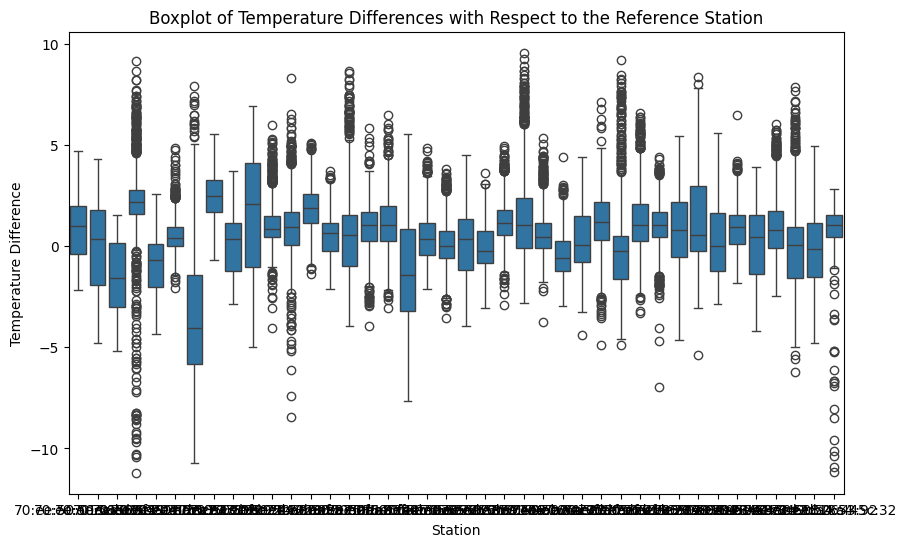

In [30]:
# Create a boxplot for each station showing the temperature differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='temp_diff', data=df_filtered)

plt.title('Boxplot of Temperature Differences with Respect to the Reference Station')
plt.xlabel('Station')
plt.ylabel('Temperature Difference')

plt.show()

In [31]:
df_merged['temp'].max()

45.0

In [32]:
# Compute mean
df_filtered = df_filtered.groupby('station')['temp_diff'].mean().reset_index()
df_filtered

,station,temp_diff
0,70:ee:50:01:ad:68,0.843368
1,70:ee:50:01:d9:c2,-0.004603
2,70:ee:50:01:f2:2a,-1.491975
3,70:ee:50:04:a4:52,2.106411
4,70:ee:50:12:7b:c8,-0.904926
5,70:ee:50:12:a7:10,0.513506
6,70:ee:50:13:33:08,-3.425683
7,70:ee:50:17:bf:b2,2.444757
8,70:ee:50:19:c7:46,0.065428
9,70:ee:50:29:14:86,1.561998


In [33]:
df_filtered = df_filtered[df_filtered['station'] != '70:ee:50:13:33:08']
df_filtered

,station,temp_diff
0,70:ee:50:01:ad:68,0.843368
1,70:ee:50:01:d9:c2,-0.004603
2,70:ee:50:01:f2:2a,-1.491975
3,70:ee:50:04:a4:52,2.106411
4,70:ee:50:12:7b:c8,-0.904926
5,70:ee:50:12:a7:10,0.513506
7,70:ee:50:17:bf:b2,2.444757
8,70:ee:50:19:c7:46,0.065428
9,70:ee:50:29:14:86,1.561998
10,70:ee:50:2b:2b:98,1.029880


## Add coordinates

In [34]:
stations = pd.read_csv('netatmo_stations.csv')
stations

,device_id,module_id,lon,lat
0,70:ee:50:af:48:f0,02:00:00:af:94:7c,-6.160594,37.534757
1,70:ee:50:af:4f:b6,02:00:00:af:99:b2,-5.893018,37.743160
2,70:ee:50:65:03:ec,02:00:00:65:2c:5e,-6.090763,37.876842
3,70:ee:50:a4:53:92,02:00:00:9d:1a:c2,-5.924903,37.158357
4,70:ee:50:83:94:74,02:00:00:83:92:28,-5.769310,37.188882
5,70:ee:50:73:e2:d8,02:00:00:74:05:fe,-5.936455,37.265705
6,70:ee:50:06:91:04,02:00:00:05:89:f0,-6.069986,37.280511
7,70:ee:50:32:ae:72,02:00:00:32:ec:40,-6.053295,37.287635
8,70:ee:50:71:59:b0,02:00:00:71:2d:da,-5.942661,37.284030
9,70:ee:50:84:2d:26,02:00:00:84:32:be,-5.935456,37.293224


In [35]:
stations = stations.drop(columns=['module_id'])
stations

,device_id,lon,lat
0,70:ee:50:af:48:f0,-6.160594,37.534757
1,70:ee:50:af:4f:b6,-5.893018,37.743160
2,70:ee:50:65:03:ec,-6.090763,37.876842
3,70:ee:50:a4:53:92,-5.924903,37.158357
4,70:ee:50:83:94:74,-5.769310,37.188882
5,70:ee:50:73:e2:d8,-5.936455,37.265705
6,70:ee:50:06:91:04,-6.069986,37.280511
7,70:ee:50:32:ae:72,-6.053295,37.287635
8,70:ee:50:71:59:b0,-5.942661,37.284030
9,70:ee:50:84:2d:26,-5.935456,37.293224


In [36]:
data = pd.merge(df_filtered, stations, left_on='station', right_on='device_id')
data.head()

,station,temp_diff,device_id,lon,lat
0,70:ee:50:01:ad:68,0.843368,70:ee:50:01:ad:68,-5.999379,37.372700
1,70:ee:50:01:d9:c2,-0.004603,70:ee:50:01:d9:c2,-6.064502,37.350200
2,70:ee:50:04:a4:52,2.106411,70:ee:50:04:a4:52,-5.953227,37.480981
3,70:ee:50:12:7b:c8,-0.904926,70:ee:50:12:7b:c8,-6.031655,37.339592
4,70:ee:50:12:a7:10,0.513506,70:ee:50:12:a7:10,-6.037298,37.385381


In [37]:
data = data.drop(columns=['device_id'])
data.head()

,station,temp_diff,lon,lat
0,70:ee:50:01:ad:68,0.843368,-5.999379,37.372700
1,70:ee:50:01:d9:c2,-0.004603,-6.064502,37.350200
2,70:ee:50:04:a4:52,2.106411,-5.953227,37.480981
3,70:ee:50:12:7b:c8,-0.904926,-6.031655,37.339592
4,70:ee:50:12:a7:10,0.513506,-6.037298,37.385381


In [38]:
data.to_csv('diff.csv', index=False)